## 1. Import data (h5 file)

In [1]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
import cv2

In [2]:
files = os.listdir('/eos/experiment/awake/event_data/2024/10/08')

f = h5py.File('/eos/experiment/awake/event_data/2024/10/08/'+files[248],'r')

In [3]:
## check some file info

print(list(f['AwakeEventData']['TCC4.SPECTRO1.DigiCam']))
print((f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D'][:]).ndim)
#print((f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D'][:]))
print(len(files))

['AcquiredParameters', 'ExtractionImage']
2
774


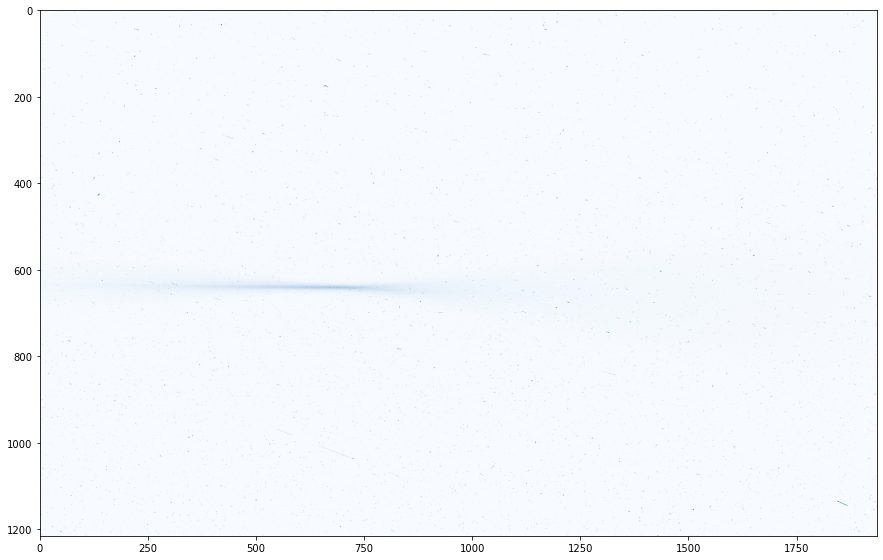

In [4]:
## preliminary plot

plt.figure(figsize=(15,10))
plt.imshow(f['AwakeEventData'][f'TCC4.SPECTRO3.DigiCam']['ExtractionImage']['image2D'][:],vmax=4095,cmap='Blues')
#plt.xlim(100,1250)
#plt.ylim(550,750)

## 2. Plotting Function

In [5]:
d = '2024/10/08'
'/eos/experiment/awake/event_data/'+d

'/eos/experiment/awake/event_data/2024/10/08'

In [2]:
## simple function to load in and plot spectrometer data
def spectro_plot(date,event_no,spectro_no):
    
    file = os.listdir('/eos/experiment/awake/event_data/'+date)
    f = h5py.File('/eos/experiment/awake/event_data/'+date+'/'+files[event_no],'r')
    
    plt.figure(figsize=(15,10))
    
    plt.title('Spectrometer Camera '+ str(spectro_no)+' Image, '+date,fontsize=25)
    plt.xlabel('X pixel number',fontsize=20)
    plt.ylabel('Y pixel number',fontsize=20)
    fig = (f['AwakeEventData'][f'TCC4.SPECTRO'+str(spectro_no)+'.DigiCam']['ExtractionImage']['image2D'][:])
    
    return plt.imshow(fig,vmax=4095,cmap='Blues')

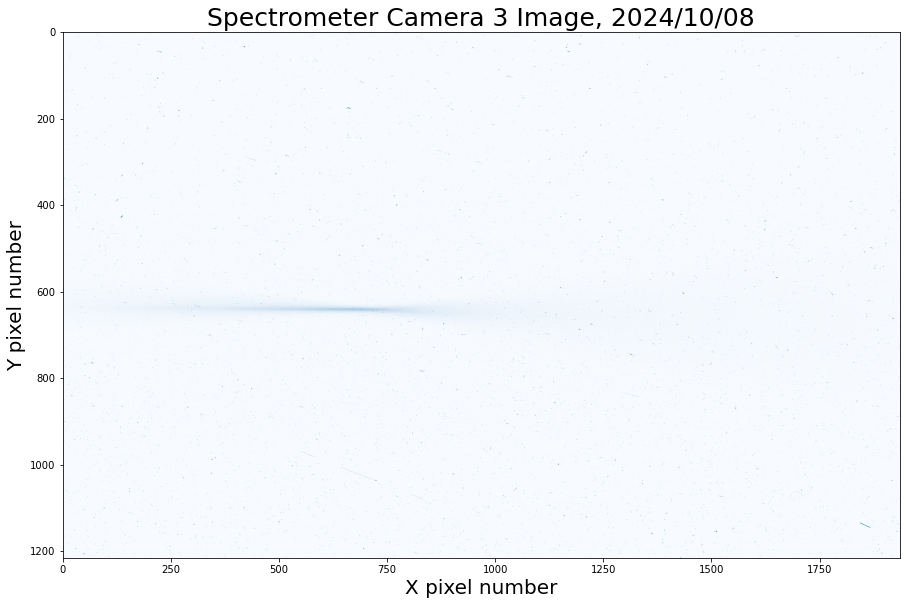

In [7]:
spectro_plot('2024/10/08',248,3)

## 3. Background subtraction ?

In [8]:
img = f['AwakeEventData'][f'TCC4.SPECTRO3.DigiCam']['ExtractionImage']['image2D'][:]

(-10.0, 100.0)

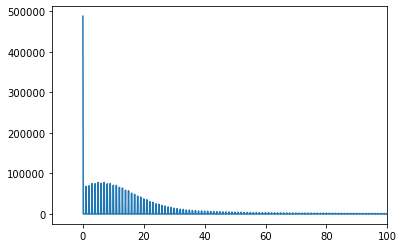

In [9]:
histogram, bin_edges = np.histogram(img, bins=32767)
plt.plot(bin_edges[0:-1], histogram)  # <- or here
plt.xlim(-10,100)

In [3]:
#define function to fit
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

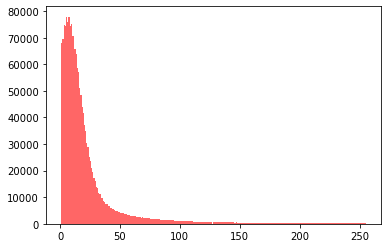

In [11]:
counts, bins, patches = plt.hist(img.ravel(),256,[1,255], color = 'red', density = False, alpha=0.6, label = 'FtsZ')

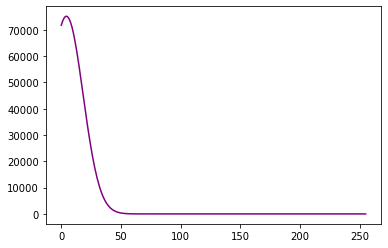

In [12]:
popt, pcov = curve_fit(gaussian, bins[0:256], counts)

plt.plot(np.arange(0,256,1), gaussian(np.arange(0,256,1), *popt), '-', color = 'purple', lw=1.5, label = "Gaussian")

Text(0, 0.5, 'Count')

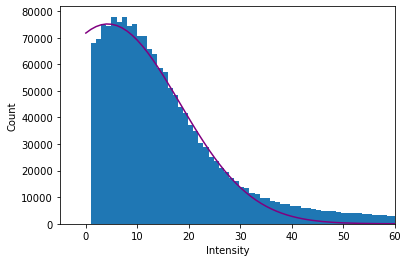

In [13]:
plt.hist(img.ravel(),256,[1,255])
plt.plot(np.arange(0,256,1), gaussian(np.arange(0,256,1), *popt), '-', color = 'purple', lw=1.5, label = "Gaussian")
plt.xlim(-5,60)

plt.xlabel('Intensity')
plt.ylabel('Count')

In [14]:
img.shape

(1216, 1936)

Text(0, 0.5, 'Mean intensity')

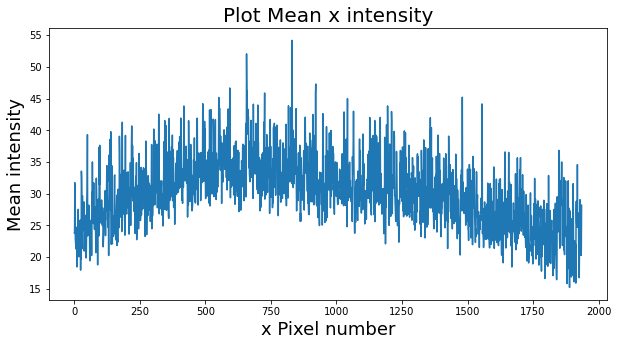

In [15]:
## avg Intensity vs position along x axis
## 0 parameter == Axis or axes along which the means are computed. The default is to compute the mean of the flattened array.

mean_x_intensity = np.mean(img, 0)

plt.figure(figsize=(10,5))
plt.plot(mean_x_intensity)
plt.title('Plot Mean x intensity',fontsize=20)
plt.xlabel('x Pixel number',fontsize=18)
plt.ylabel('Mean intensity',fontsize=18)

Text(0, 0.5, 'Mean intensity')

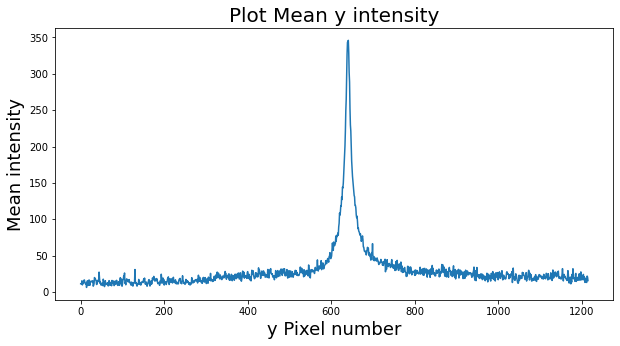

In [16]:
mean_y_intensity = np.mean(img, 1)

## laplace????

plt.figure(figsize=(10,5))
plt.plot(mean_y_intensity)
plt.title('Plot Mean y intensity',fontsize=20)
plt.xlabel('y Pixel number',fontsize=18)
plt.ylabel('Mean intensity',fontsize=18)

Standard dev = 5.390828742304928
-1.022867745961392e-05 0.016816855574006535 26.614692488080326


Text(0, 0.5, 'Mean intensity')

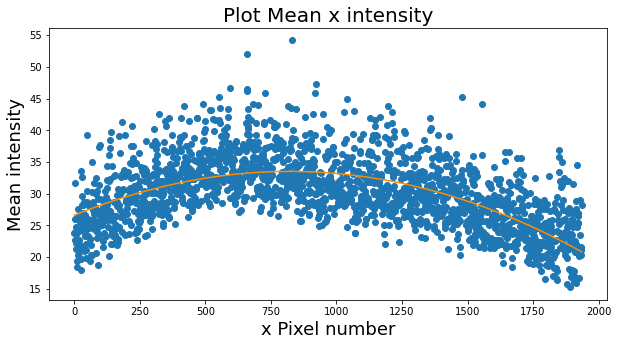

In [17]:
plt.figure(figsize=(10,5))
len(np.arange(0,len(mean_x_intensity),1))
print('Standard dev = '+ str(np.std(mean_x_intensity)))

xx = np.arange(0,len(mean_x_intensity),1)
a,b,c = np.polyfit(np.arange(0,len(mean_x_intensity),1),mean_x_intensity,2)
print(a,b,c)

plt.plot(xx,a*xx**2+b*xx+c,color='darkorange')
plt.scatter(np.arange(0,len(mean_x_intensity),1),mean_x_intensity)
plt.title('Plot Mean x intensity',fontsize=20)
plt.xlabel('x Pixel number',fontsize=18)
plt.ylabel('Mean intensity',fontsize=18)

## Intensity histograms

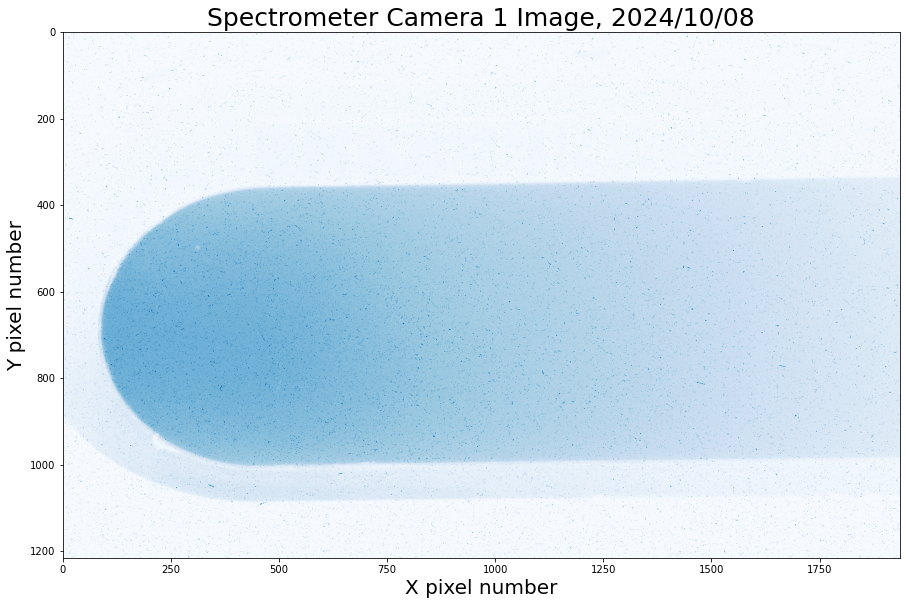

In [18]:
spectro_plot('2024/10/08',15,1)

In [19]:
### off screen histogram gives noise distribution of sensor (would do for each camera??)
### take slice, 0-250? 

In [10]:
def off_screen_hist(date,event_no,spectro_no,index1,index2):
    
    file = os.listdir('/eos/experiment/awake/event_data/'+date)
    f = h5py.File('/eos/experiment/awake/event_data/'+date+'/'+files[event_no],'r')
    
    off_screen_data = f['AwakeEventData'][f'TCC4.SPECTRO'+str(spectro_no)+'.DigiCam']['ExtractionImage']['image2D'][index1:index2]
        
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 5))
    
    ax1.set_title('Spectrometer Camera '+ str(spectro_no)+' Image, '+date,fontsize=15)
    ax1.set_xlabel('X pixel number',fontsize=15)
    ax1.set_ylabel('Y pixel number',fontsize=15)
    
    fig1 = (f['AwakeEventData'][f'TCC4.SPECTRO'+str(spectro_no)+'.DigiCam']['ExtractionImage']['image2D'][:])
    ax1.imshow(fig1,cmap='Blues')
    ax1.hlines(y=index2,xmin=0,xmax=1935,colors='orange',linestyles='--')
    ax1.hlines(y=index1,xmin=0,xmax=1935,colors='orange',linestyles='--')
    
    ax2.set_title('Histogram Off screen Intensity, pixels ' +str(index1)+' - '+str(index2),fontsize=15)
    ax2.set_xlabel('Pixel Intensity',fontsize=15)
    ax2.set_ylabel('Pixel Count',fontsize=15)
    
    pixel_range = np.arange(0,256,1)
    counts, bins, patches = ax2.hist(off_screen_data.ravel(),256,[1,255], density = False, alpha=0.8, label = 'Pixel Count')    
    
    popt, pcov = curve_fit(gaussian, bins[0:256], counts)
    ax2.plot(pixel_range, gaussian(pixel_range, *popt), '-', color = 'purple', lw=1.5, label = "Gaussian Fit")
    #ax2.set_xlim(left=None,right=80)
    ax2.legend()
    
    return "mean = {0:4.1f} with stdev = {1:4.1f}".format(popt[1],-popt[2])

'mean =  5.3 with stdev = -10.7'

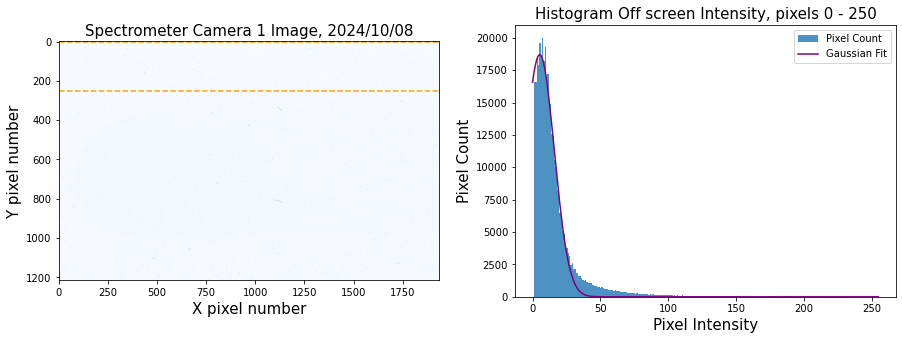

In [11]:
off_screen_hist('2024/10/08',248,1,0,250)

'mean = 10.8 with stdev = -11.3'

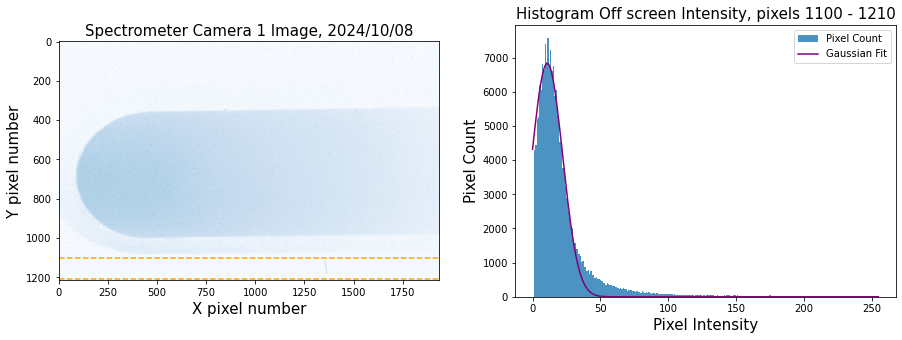

In [18]:
off_screen_hist('2024/10/08',55,1,1100,1210)

'mean =  1.0 with stdev = -1.0'

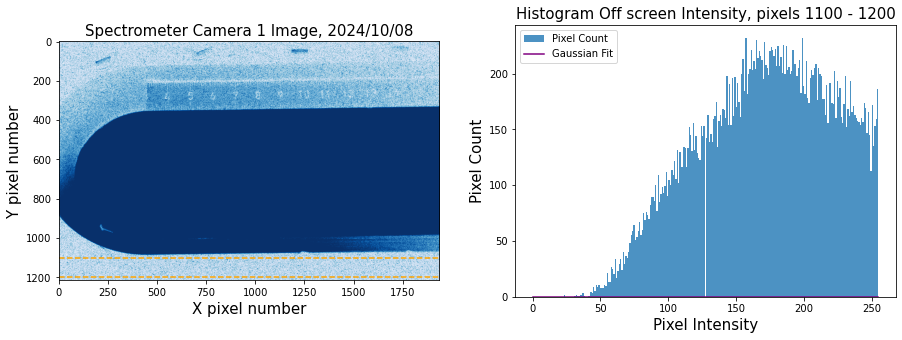

In [23]:
off_screen_hist('2024/10/08',10,1,1100,1200)

'mean = 13.7 with stdev = -11.8'

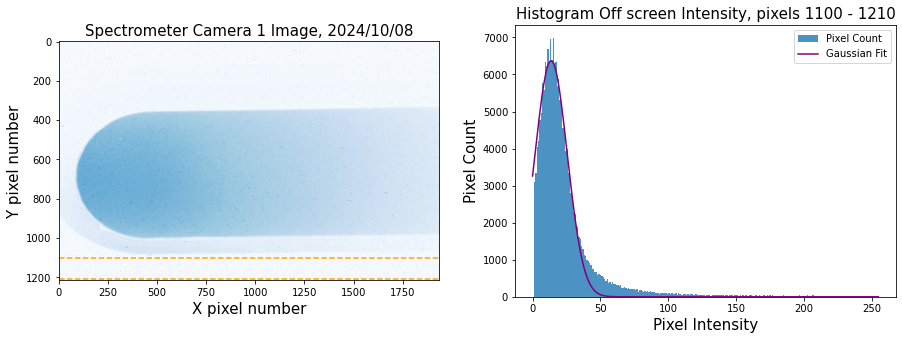

In [24]:
off_screen_hist('2024/10/08',15,1,1100,1210)

'mean =  1.0 with stdev = -1.0'

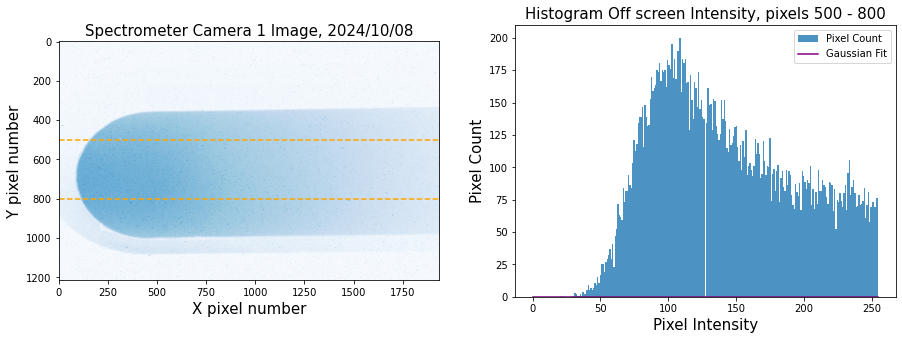

In [25]:
off_screen_hist('2024/10/08',15,1,500,800)

## Including all intensities

In [26]:
f = h5py.File('/eos/experiment/awake/event_data/2024/10/08/'+files[400],'r')
data = f['AwakeEventData'][f'TCC4.SPECTRO3.DigiCam']['ExtractionImage']['image2D'][:]

In [27]:
(np.array(data)).max(axis=1)

array([3920, 4095, 1777, ..., 4095, 1950, 2285], dtype=int16)

In [28]:
def test_intensities(date,event_no,spectro_no,index1,index2):
    
    file = os.listdir('/eos/experiment/awake/event_data/'+date)
    f = h5py.File('/eos/experiment/awake/event_data/'+date+'/'+files[event_no],'r')
    
    off_screen_data = f['AwakeEventData'][f'TCC4.SPECTRO'+str(spectro_no)+'.DigiCam']['ExtractionImage']['image2D'][index1:index2]
        
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 5))
    
    ax1.set_title('Spectrometer Camera '+ str(spectro_no)+' Image, '+date,fontsize=15)
    ax1.set_xlabel('X pixel number',fontsize=15)
    ax1.set_ylabel('Y pixel number',fontsize=15)
    
    fig1 = (f['AwakeEventData'][f'TCC4.SPECTRO'+str(spectro_no)+'.DigiCam']['ExtractionImage']['image2D'][:])
    ax1.imshow(fig1,vmin=0,vmax=4096,cmap='Blues')
    ax1.hlines(y=index2,xmin=0,xmax=1935,colors='orange',linestyles='--')
    ax1.hlines(y=index1,xmin=0,xmax=1935,colors='orange',linestyles='--')
    
    ax2.set_title('Histogram Intensity, pixels ' +str(index1)+' - '+str(index2),fontsize=15)
    ax2.set_xlabel('Pixel Intensity',fontsize=15)
    ax2.set_ylabel('Pixel Count',fontsize=15)
    
    pixel_range = np.arange(0,4096,1)
    counts, bins, patches = ax2.hist(off_screen_data.flatten(),bins=int(4095), density = False, alpha=0.8, label = 'Pixel Count')    
    
    #popt, pcov = curve_fit(gaussian, bins[0:-1], counts)
    #ax2.plot(pixel_range, gaussian(pixel_range, *popt), '-', color = 'purple', lw=1.5, label = "Gaussian Fit")
    #ax2.set_xlim(left=None,right=80)
    ax2.legend()
    
    return "mean = {0:4.1f} with stdev = {1:4.1f}".format(popt[1],-popt[2])

'mean =  4.3 with stdev = -13.9'

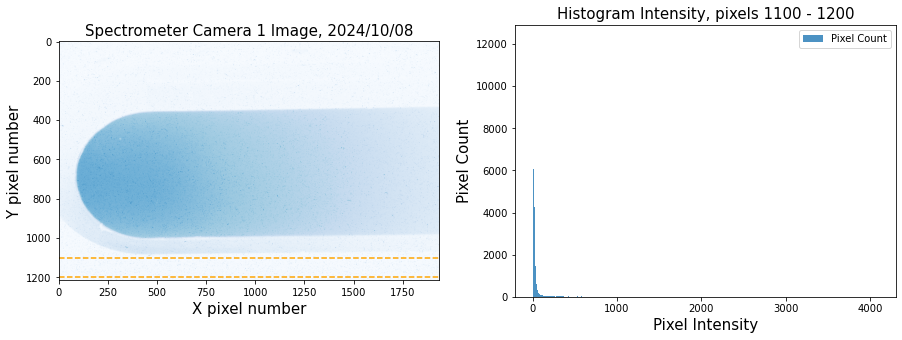

In [29]:
test_intensities('2024/10/08',15,1,1100,1200)

'mean =  4.3 with stdev = -13.9'

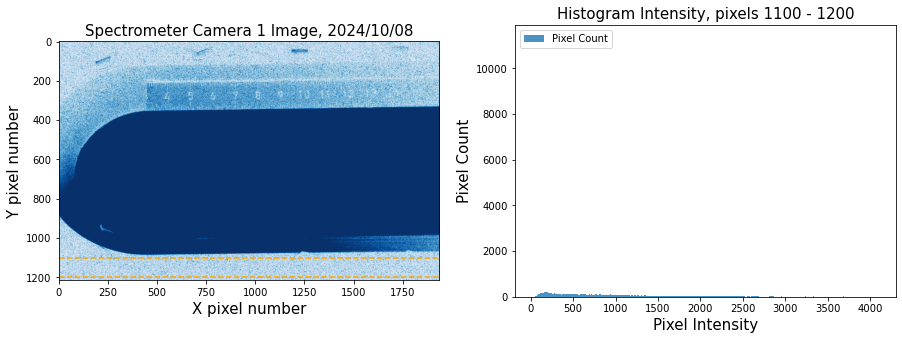

In [30]:
test_intensities('2024/10/08',10,1,1100,1200)

'mean =  4.3 with stdev = -13.9'

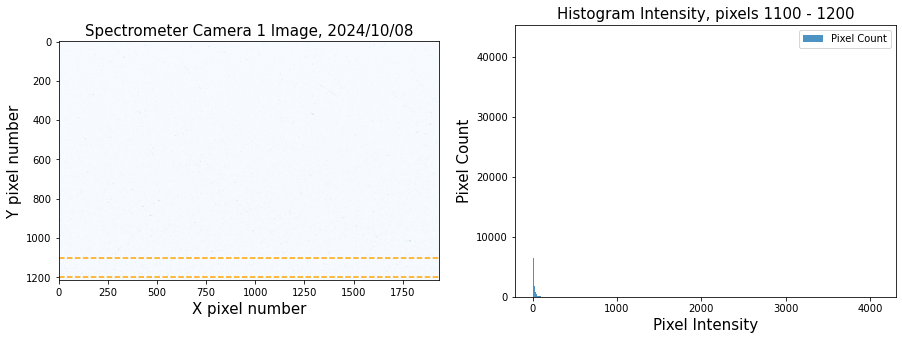

In [31]:
test_intensities('2024/10/08',400,1,1100,1200)

'mean =  4.3 with stdev = -13.9'

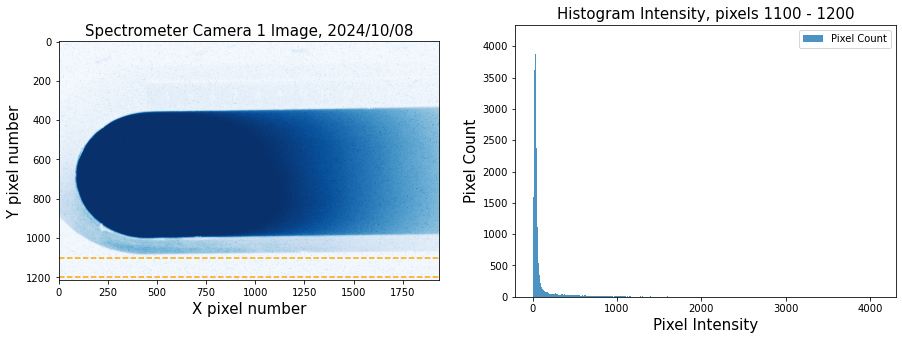

In [32]:
test_intensities('2024/10/08',500,1,1100,1200)

In [33]:
### still have varying pixel intensity in same slice - suggests sensor noise not constant ,, not really possible 
### problem with histogram binning??
### can try scaling and normalising

## Scale to 8 bit ?? 

In [36]:
f = h5py.File('/eos/experiment/awake/event_data/2024/10/08/'+files[15],'r')
data = f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D'][:]

In [37]:
data = f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D'][:]

In [38]:
scaled_image = ((data / 4095) * 255).astype('uint8')

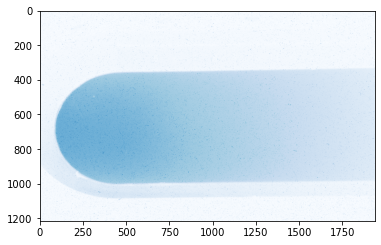

In [39]:
plt.imshow(scaled_image,vmin=0,vmax=255,cmap='Blues')

In [40]:
def test_8bit(date,event_no,spectro_no,index1,index2):
    
    file = os.listdir('/eos/experiment/awake/event_data/'+date)
    f = h5py.File('/eos/experiment/awake/event_data/'+date+'/'+files[event_no],'r')
    
    off_screen_data = f['AwakeEventData'][f'TCC4.SPECTRO'+str(spectro_no)+'.DigiCam']['ExtractionImage']['image2D'][index1:index2]
    scaled_image = ((off_screen_data / 4095) * 255).astype('uint8')
    
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 5))
    
    ax1.set_title('Spectrometer Camera '+ str(spectro_no)+' Image, '+date,fontsize=15)
    ax1.set_xlabel('X pixel number',fontsize=15)
    ax1.set_ylabel('Y pixel number',fontsize=15)
    
    image = f['AwakeEventData'][f'TCC4.SPECTRO'+str(spectro_no)+'.DigiCam']['ExtractionImage']['image2D'][:]
    scaled_full_image = ((image / 4095) * 255).astype('uint8')
    ax1.imshow(scaled_full_image,vmin=0,vmax=256,cmap='Blues')
    ax1.hlines(y=index2,xmin=0,xmax=1935,colors='orange',linestyles='--')
    ax1.hlines(y=index1,xmin=0,xmax=1935,colors='orange',linestyles='--')
    
    ax2.set_title('Histogram Intensity, pixels ' +str(index1)+' - '+str(index2),fontsize=15)
    ax2.set_xlabel('Pixel Intensity',fontsize=15)
    ax2.set_ylabel('Pixel Count',fontsize=15)
    
    pixel_range = np.arange(0,256,1)
    counts, bins, patches = ax2.hist(scaled_image.flatten(),bins=int(255), density = False, alpha=0.8, label = 'Pixel Count')    
    
    #popt, pcov = curve_fit(gaussian, bins[0:-1], counts)
    #ax2.plot(pixel_range, gaussian(pixel_range, *popt), '-', color = 'purple', lw=1.5, label = "Gaussian Fit")
    #ax2.set_xlim(left=None,right=80)
    ax2.legend()
    
    return "mean = {0:4.1f} with stdev = {1:4.1f}".format(popt[1],-popt[2])

'mean =  4.3 with stdev = -13.9'

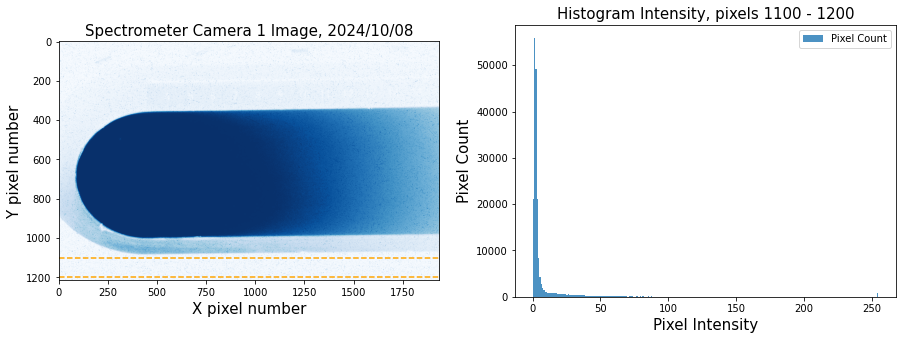

In [41]:
test_8bit('2024/10/08',500,1,1100,1200)

'mean =  4.3 with stdev = -13.9'

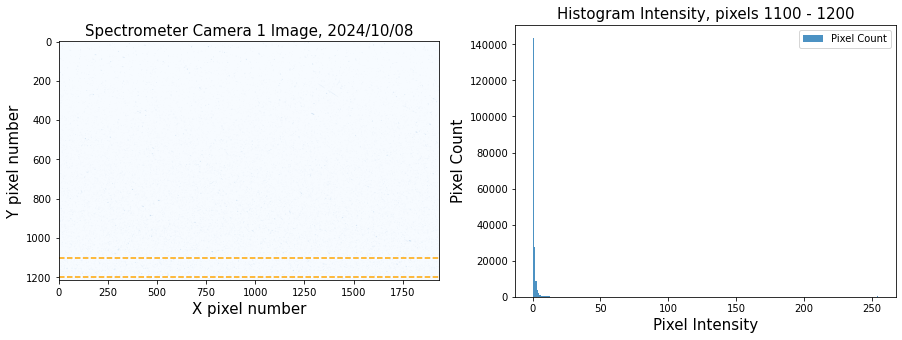

In [42]:
test_8bit('2024/10/08',400,1,1100,1200)

'mean =  4.3 with stdev = -13.9'

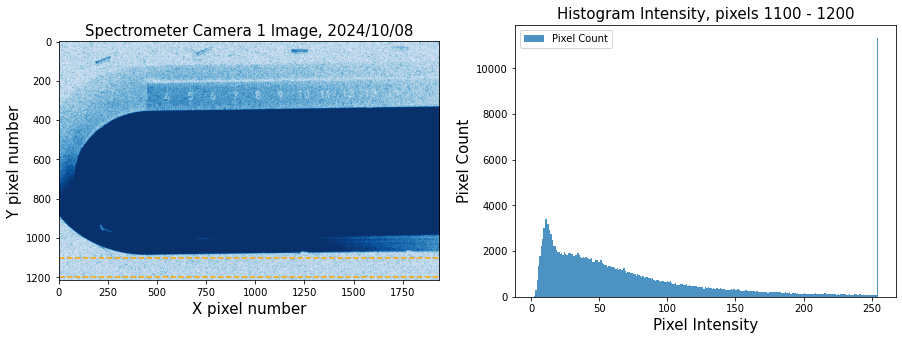

In [43]:
test_8bit('2024/10/08',10,1,1100,1200)

'mean =  4.3 with stdev = -13.9'

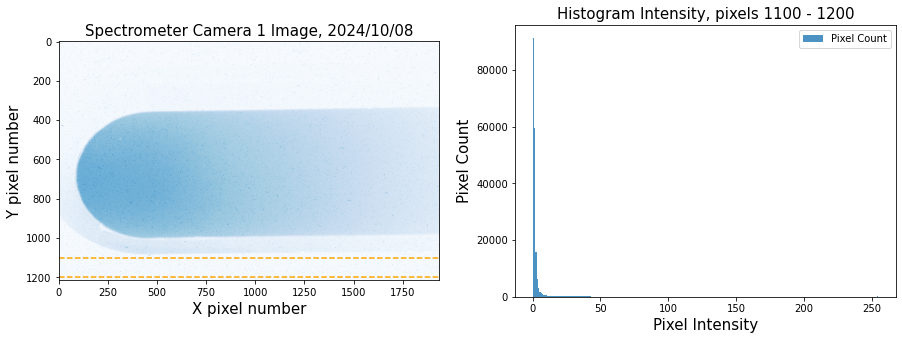

In [44]:
test_8bit('2024/10/08',15,1,1100,1200)

In [45]:
#### plot these histograms on top of each other???

In [19]:
list_events = np.arange(0,12,1)

In [22]:
event_images = []
event_images_scaled = []
event_images_no_vignette = []

for i in list_events:

    f = h5py.File('/eos/experiment/awake/event_data/2024/10/08/'+files[i],'r')
    data = f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D'][1100:1200]
    full_data = f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D']
    scale = ((data / 4095) * 255).astype('uint8')
    no_vignette = (full_data[8:1208,8:1928]/flat_field).astype(int)
    no_vignette_slice = no_vignette[1100:1190]
    
    event_images.append(data)
    event_images_scaled.append(scale)
    event_images_no_vignette.append(no_vignette_slice)

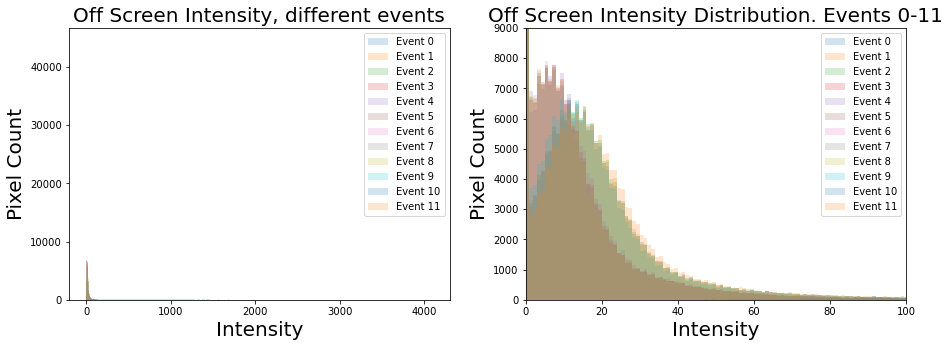

In [24]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

for i in list_events:
    ax1.hist(event_images[i].flatten(),bins=int(4095), density = False, alpha=0.2, label = 'Event '+str(i));  
    ax2.hist(event_images[i].flatten(),bins=int(4095), density = False, alpha=0.2, label = 'Event '+str(i));  

ax1.set_title('Off Screen Intensity, different events',fontsize=20)
ax1.set_xlabel('Intensity',fontsize=20)
ax1.set_ylabel('Pixel Count',fontsize=20)
ax1.legend()

ax2.set_title('Off Screen Intensity Distribution. Events 0-11',fontsize=20)
ax2.set_xlabel('Intensity',fontsize=20)
ax2.set_ylabel('Pixel Count',fontsize=20)
ax2.set_xlim(0,100)
ax2.set_ylim(0,9000)
ax2.legend()

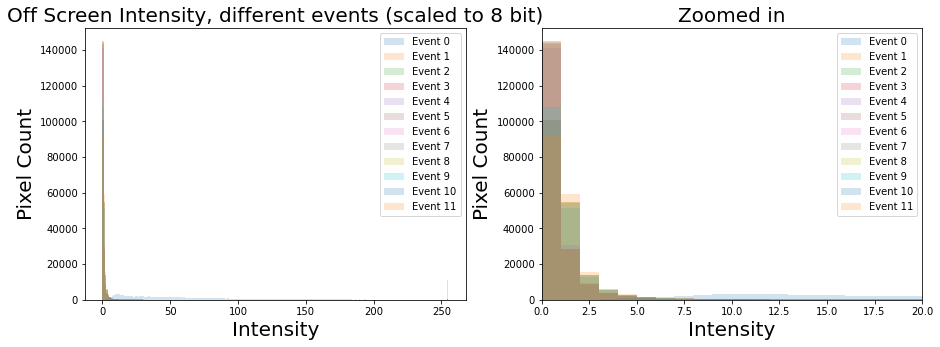

In [56]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

for i in list_events:
    ax1.hist(event_images_scaled[i].flatten(),bins=int(255), density = False, alpha=0.2, label = 'Event '+str(i));  
    ax2.hist(event_images_scaled[i].flatten(),bins=int(255), density = False, alpha=0.2, label = 'Event '+str(i));  

ax1.set_title('Off Screen Intensity, different events (scaled to 8 bit)',fontsize=20)
ax1.set_xlabel('Intensity',fontsize=20)
ax1.set_ylabel('Pixel Count',fontsize=20)
ax1.legend()

ax2.set_title('Zoomed in',fontsize=20)
ax2.set_xlabel('Intensity',fontsize=20)
ax2.set_ylabel('Pixel Count',fontsize=20)
ax2.set_xlim(0,20)
ax2.legend()

In [ ]:
### should be identical ????

## Basic vignetting correction

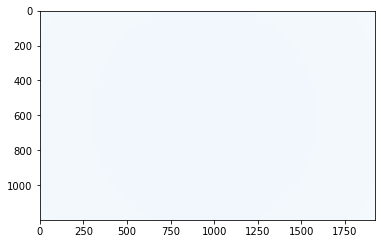

In [3]:
flat_field = cv2.imread('/eos/user/s/sweeneye/SWAN_projects/calibration.tiff',cv2.IMREAD_GRAYSCALE)

plt.imshow(flat_field,vmin=0,vmax=4095,cmap='Blues')

In [49]:
np.max(flat_field)

121

Text(0.5, 1.0, 'Flat Field for Vignetting')

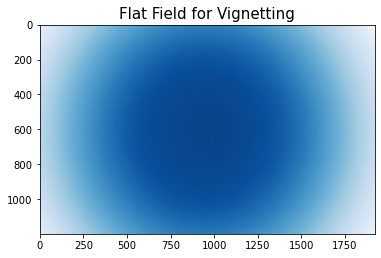

In [6]:
plt.imshow(flat_field,cmap='Blues')
plt.title('Flat Field for Vignetting',fontsize=15)

In [51]:
f = h5py.File('/eos/experiment/awake/event_data/2024/10/08/'+files[15],'r')
data = f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D'][:]

In [52]:
int(np.max(data[8:1208,8:1928]/flat_field))

73

In [53]:
def vignetting(date,event_no,spectro_no,index1,index2):
    
    file = os.listdir('/eos/experiment/awake/event_data/'+date)
    f = h5py.File('/eos/experiment/awake/event_data/'+date+'/'+files[event_no],'r')
    data = f['AwakeEventData'][f'TCC4.SPECTRO'+str(spectro_no)+'.DigiCam']['ExtractionImage']['image2D'][:]
    
    remove_vignette = (data[8:1208,8:1928]/flat_field).astype(int)    
    #print(remove_vignetete)
    off_screen_data = remove_vignette[index1:index2]
        
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15, 5))
    
    ax1.set_title('Spectrometer Camera '+ str(spectro_no)+' Image, '+date,fontsize=15)
    ax1.set_xlabel('X pixel number',fontsize=15)
    ax1.set_ylabel('Y pixel number',fontsize=15)
    
    fig1 = remove_vignette
    ax1.imshow(fig1,vmin=0,vmax=4096/np.max(flat_field),cmap='Blues')
    ax1.hlines(y=index2,xmin=0,xmax=1919,colors='orange',linestyles='--')
    ax1.hlines(y=index1,xmin=0,xmax=1919,colors='orange',linestyles='--')
    
    ax2.set_title('Histogram Intensity, pixels ' +str(index1)+' - '+str(index2),fontsize=15)
    ax2.set_xlabel('Pixel Intensity',fontsize=15)
    ax2.set_ylabel('Pixel Count',fontsize=15)
    
    pixel_range = np.arange(0,4096,1)
    counts, bins, patches = ax2.hist(off_screen_data.flatten(),bins=int(4095), density = False, alpha=0.8, label = 'Pixel Count')    
    
    #popt, pcov = curve_fit(gaussian, bins[0:-1], counts)
    #ax2.plot(pixel_range, gaussian(pixel_range, *popt), '-', color = 'purple', lw=1.5, label = "Gaussian Fit")
    #ax2.set_xlim(left=None,right=80)
    ax2.legend()
    
    return "mean = {0:4.1f} with stdev = {1:4.1f}".format(popt[1],-popt[2])

'mean =  4.3 with stdev = -13.9'

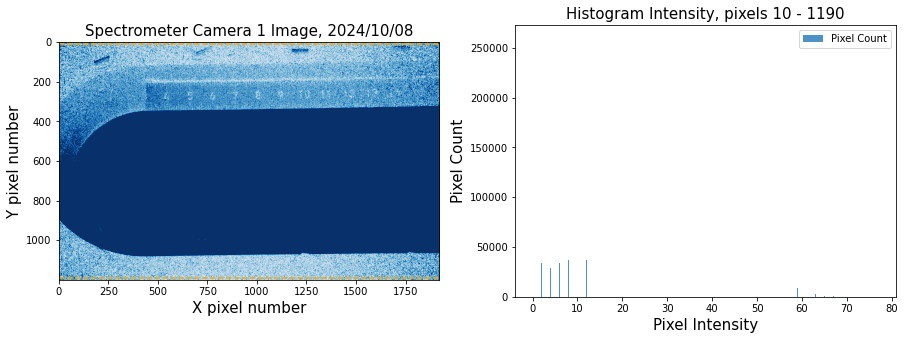

In [57]:
vignetting('2024/10/08',10,1,10,1190)

'mean =  4.3 with stdev = -13.9'

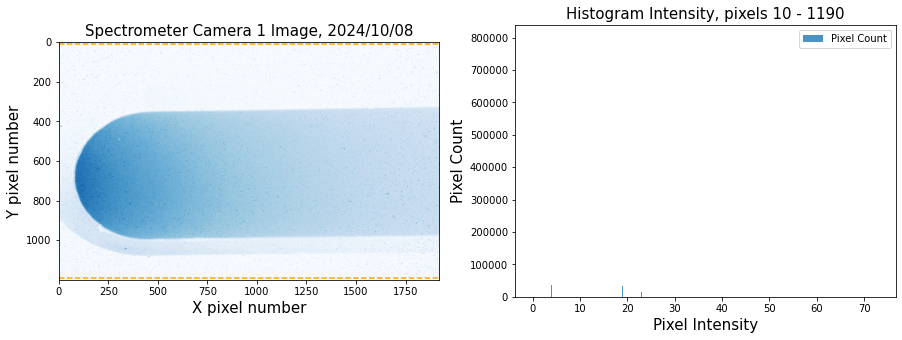

In [58]:
vignetting('2024/10/08',15,1,10,1190)

'mean =  4.3 with stdev = -13.9'

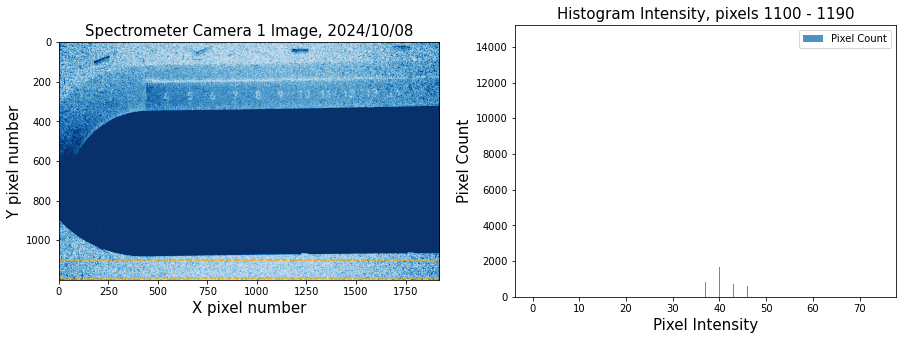

In [59]:
vignetting('2024/10/08',10,1,1100,1190)

'mean =  4.3 with stdev = -13.9'

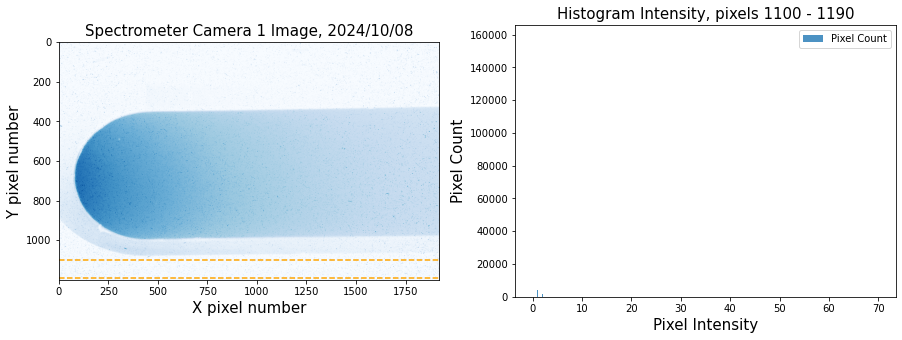

In [60]:
vignetting('2024/10/08',15,1,1100,1190)

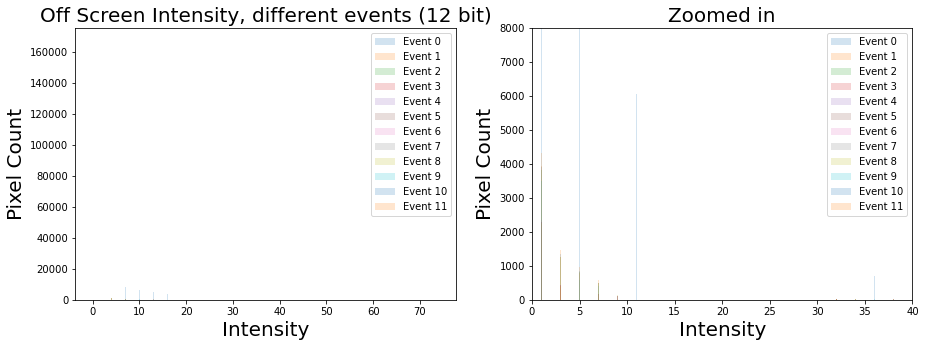

In [61]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))

for i in list_events:
    ax1.hist(event_images_no_vignette[i].flatten(),bins=int(4095), density = False, alpha=0.2, label = 'Event '+str(i));  
    ax2.hist(event_images_no_vignette[i].flatten(),bins=int(4095), density = False, alpha=0.2, label = 'Event '+str(i));  

ax1.set_title('Off Screen Intensity, different events (12 bit)',fontsize=20)
ax1.set_xlabel('Intensity',fontsize=20)
ax1.set_ylabel('Pixel Count',fontsize=20)
ax1.legend()

ax2.set_title('Zoomed in',fontsize=20)
ax2.set_xlabel('Intensity',fontsize=20)
ax2.set_ylabel('Pixel Count',fontsize=20)
ax2.set_xlim(0,40)
ax2.set_ylim(0,8000)
ax2.legend()

## Off Screen Histograms

In [4]:
files = os.listdir('/eos/experiment/awake/event_data/2024/10/08')
f = h5py.File('/eos/experiment/awake/event_data/2024/10/08/'+files[450],'r')
len(files)

774

In [13]:
print(f['AwakeEventData']['TT41.BCTF.412340']['CaptureAcquisition']['totalIntensity'][0])

27.881004


In [14]:
proton_no = []

for i in np.arange(0,10,1):
    
    f = h5py.File('/eos/experiment/awake/event_data/2024/10/08/'+files[i],'r')
    protons = f['AwakeEventData']['TT41.BCTF.412340']['CaptureAcquisition']['totalIntensity'][0]
    proton_no.append(protons)

In [15]:
proton_no

[13.529813, 14.491424, 13.190673, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 14.1437]

In [38]:
## slicing 1100 to 1200 
## treating as 12 bit 

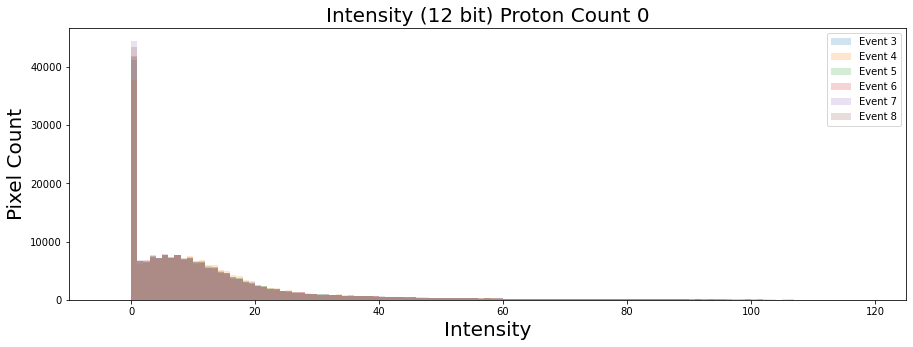

In [39]:
fit_parameters = []
fig,ax1 = plt.subplots(1,figsize=(15,5))
pcovs=[]

for i in np.arange(0,15,1):
    
    f = h5py.File('/eos/experiment/awake/event_data/2024/10/08/'+files[i],'r')
    data = f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D'][1100:1200]
    protons = f['AwakeEventData']['TT41.BCTF.412340']['CaptureAcquisition']['totalIntensity'][0]
    
    if protons == 0:
        #ax1.hist(data.flatten(),bins=int(4095), density = False, alpha=0.2, label = 'Event '+str(i));  
        pixel_range = np.arange(0,4096,1)
        counts, bins, patches = ax1.hist(data.ravel(),4095,[0,4095], density = False, alpha=0.2, label = 'Event '+str(i))    
    
        #popt, pcov = curve_fit(gaussian, bins[0:4095], counts)
        #ax1.plot(pixel_range, gaussian(pixel_range, *popt), '-', color = 'purple', lw=1.5)
        
        #fit_parameters.append(popt)
        
        
#mean_fit = np.mean(fit_parameters,axis=0)
#print(mean_fit)
        
ax1.set_title('Intensity (12 bit) Proton Count 0',fontsize=20)
ax1.set_xlabel('Intensity',fontsize=20)
ax1.set_ylabel('Pixel Count',fontsize=20)
ax1.set_xlim(-10,125)
ax1.legend()

[7.32104402e+03 3.78126281e+00 1.16507223e+01]
[16.43790134  0.08692035  0.06384292]
60


(-10.0, 125.0)

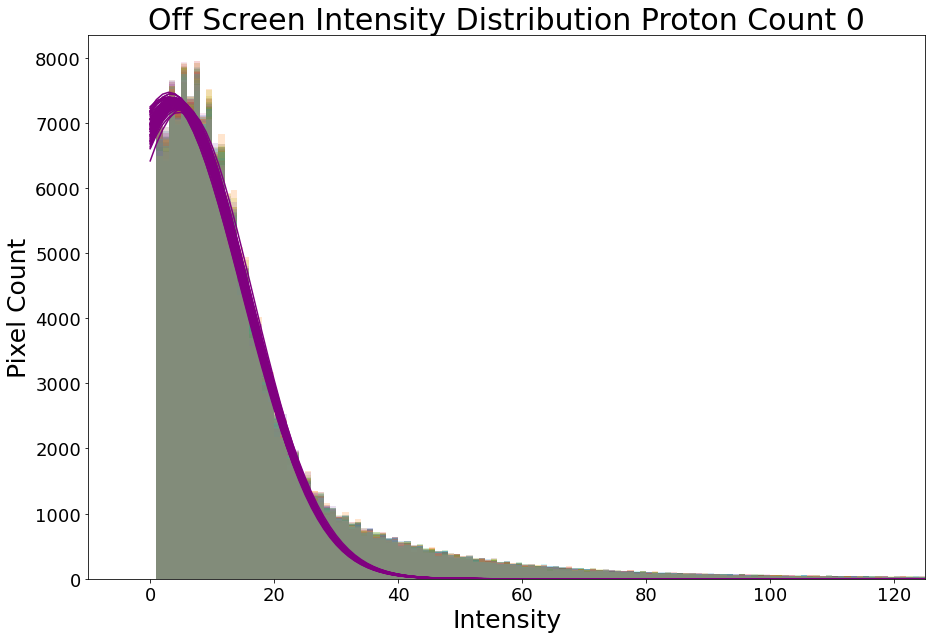

In [4]:
fit_parameters = []
list_0_events = []
pcovs_avg = []

fig,ax1 = plt.subplots(1,figsize=(15,10))

for i in np.arange(0,len(files),1):
    
    f = h5py.File('/eos/experiment/awake/event_data/2024/10/08/'+files[i],'r')
    data = f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D'][1100:1200]
    protons = f['AwakeEventData']['TT41.BCTF.412340']['CaptureAcquisition']['totalIntensity'][0]
    
    if protons == 0:
        pixel_range = np.arange(0,4096,1)
        counts, bins, patches = ax1.hist(data.ravel(),4095,[1,4095], density = False, alpha=0.2, label = 'Event '+str(i))    
    
        popt, pcov = curve_fit(gaussian, bins[0:4095], counts)
        ax1.plot(pixel_range, gaussian(pixel_range, *popt), '-', color = 'purple', lw=1.5)
        
        fit_parameters.append(popt)
        perr = np.sqrt(np.diag(pcov))
        pcovs_avg.append(perr)
        list_0_events.append(i)
        
mean_fit = np.mean(fit_parameters,axis=0)
mean_error = np.mean(pcovs_avg,axis=0)

print(mean_fit)
print(mean_error)
print(len(list_0_events))
                        
ax1.set_title('Off Screen Intensity Distribution Proton Count 0',fontsize=30)
ax1.set_xlabel('Intensity',fontsize=25)
ax1.set_ylabel('Pixel Count',fontsize=25)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.set_xlim(-10,125)
#ax1.legend()

[96.26494228  3.47300732 11.6055072 ]
[0.36258594 0.13810624 0.0976616 ]
76


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


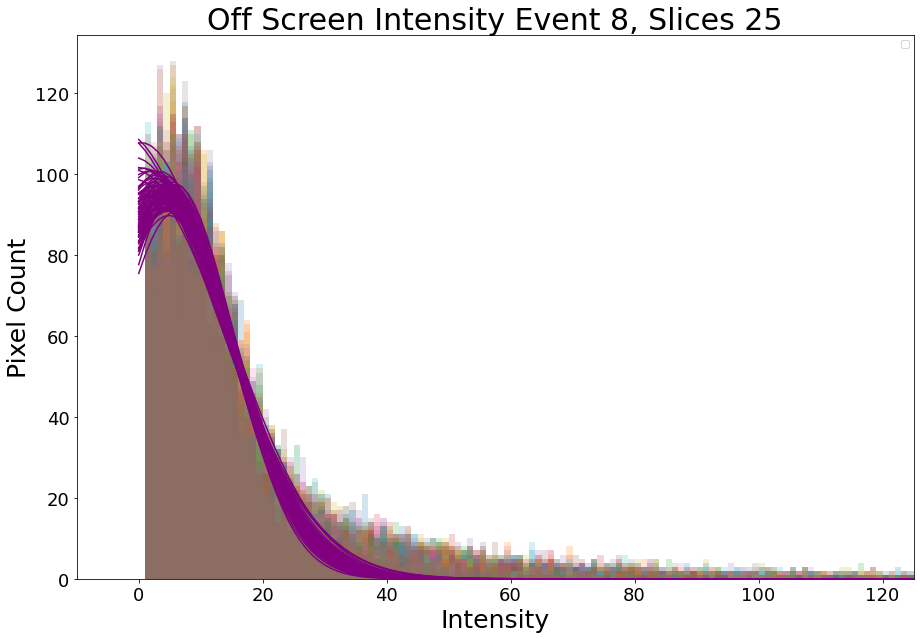

In [5]:
fit_parameters = []
list_0_events = []
pcovs_avg = []

fig,ax1 = plt.subplots(1,figsize=(15,10))

for i in np.arange(0,1900,25):
    
    f = h5py.File('/eos/experiment/awake/event_data/2024/10/08/'+files[8],'r')
    data = f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D'][1100:1200,i:i+25]
    
    if protons == 0:
        pixel_range = np.arange(0,4096,1)
        counts, bins, patches = ax1.hist(data.ravel(),4095,[1,4095], density = False, alpha=0.2)    
    
        popt, pcov = curve_fit(gaussian, bins[0:4095], counts)
        ax1.plot(pixel_range, gaussian(pixel_range, *popt), '-', color = 'purple', lw=1.5)
        
        fit_parameters.append(popt)
        perr = np.sqrt(np.diag(pcov))
        pcovs_avg.append(perr)
        list_0_events.append(i)
        
mean_fit = np.mean(fit_parameters,axis=0)
mean_error = np.mean(pcovs_avg,axis=0)

print(mean_fit)
print(mean_error)
print(len(list_0_events))
                        
ax1.set_title('Off Screen Intensity Event 8, Slices 25',fontsize=30)
ax1.set_xlabel('Intensity',fontsize=25)
ax1.set_ylabel('Pixel Count',fontsize=25)
ax1.set_xlim(-10,125)
ax1.tick_params(axis='both', which='major', labelsize=18)
ax1.legend()

[95.47923996  4.24990764 11.3461091 ]
[0.31900224 0.1198763  0.08984122]
76


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


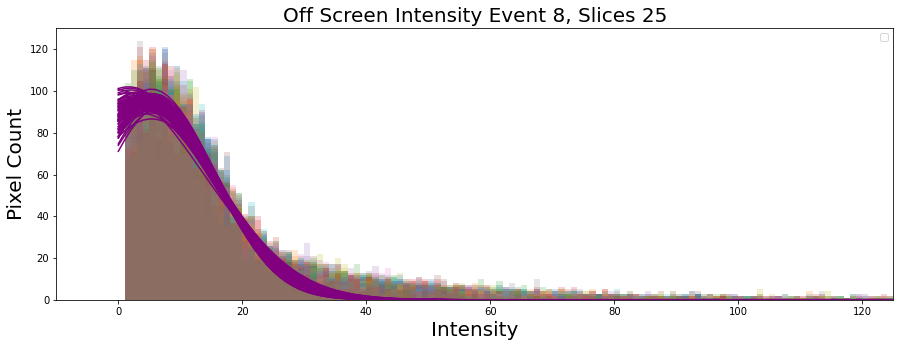

In [6]:
fit_parameters = []
list_0_events = []
pcovs_avg = []

fig,ax1 = plt.subplots(1,figsize=(15,5))

for i in np.arange(0,1900,25):
    
    f = h5py.File('/eos/experiment/awake/event_data/2024/10/08/'+files[3],'r')
    data = f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D'][1100:1200,i:i+25]
    
    pixel_range = np.arange(0,4096,1)
    counts, bins, patches = ax1.hist(data.ravel(),4095,[1,4095], density = False, alpha=0.2)    
    
    popt, pcov = curve_fit(gaussian, bins[0:4095], counts)
    ax1.plot(pixel_range, gaussian(pixel_range, *popt), '-', color = 'purple', lw=1.5)
        
    fit_parameters.append(popt)
    perr = np.sqrt(np.diag(pcov))
    pcovs_avg.append(perr)
    list_0_events.append(i)
        
mean_fit = np.mean(fit_parameters,axis=0)
mean_error = np.mean(pcovs_avg,axis=0)

print(mean_fit)
print(mean_error)
print(len(list_0_events))
                        
ax1.set_title('Off Screen Intensity Event 8, Slices 25',fontsize=20)
ax1.set_xlabel('Intensity',fontsize=20)
ax1.set_ylabel('Pixel Count',fontsize=20)
ax1.set_xlim(-10,125)
ax1.legend()

[96.21602975  3.64081406 11.6738803 ]
[0.34509275 0.13397434 0.09586808]
76


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


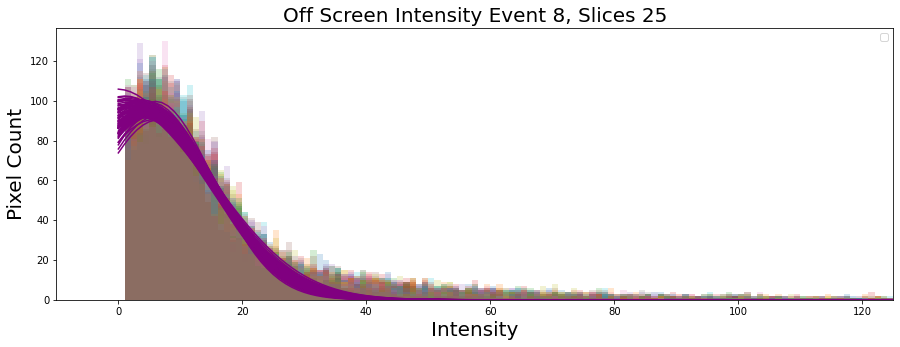

In [9]:
fit_parameters = []
list_0_events = []
pcovs_avg = []

fig,ax1 = plt.subplots(1,figsize=(15,5))

for i in np.arange(0,1900,25):
    
    f = h5py.File('/eos/experiment/awake/event_data/2024/10/08/'+files[6],'r')
    data = f['AwakeEventData'][f'TCC4.SPECTRO1.DigiCam']['ExtractionImage']['image2D'][1100:1200,i:i+25]
    
    pixel_range = np.arange(0,4096,1)
    counts, bins, patches = ax1.hist(data.ravel(),4095,[1,4095], density = False, alpha=0.2)    
    
    popt, pcov = curve_fit(gaussian, bins[0:4095], counts)
    ax1.plot(pixel_range, gaussian(pixel_range, *popt), '-', color = 'purple', lw=1.5)
        
    fit_parameters.append(popt)
    perr = np.sqrt(np.diag(pcov))
    pcovs_avg.append(perr)
    list_0_events.append(i)
        
mean_fit = np.mean(fit_parameters,axis=0)
mean_error = np.mean(pcovs_avg,axis=0)

print(mean_fit)
print(mean_error)
print(len(list_0_events))
                        
ax1.set_title('Off Screen Intensity Event 8, Slices 25',fontsize=20)
ax1.set_xlabel('Intensity',fontsize=20)
ax1.set_ylabel('Pixel Count',fontsize=20)
ax1.set_xlim(-10,125)
ax1.legend()

In [7]:
def normalised_gauss(x, mu, sigma):
    
    ans = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))
    return ans

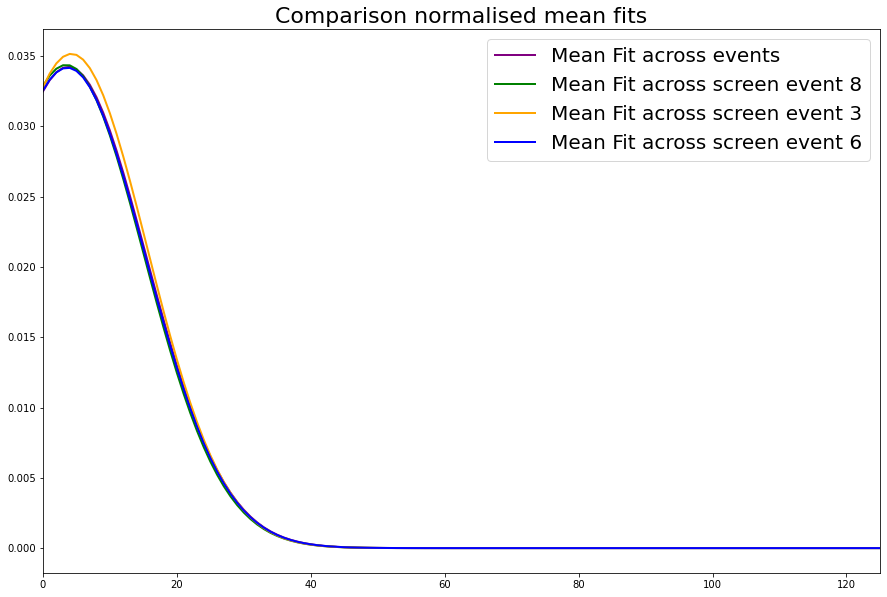

In [11]:
pixel_range = np.arange(0,4096,1)

plt.figure(figsize=(15,10))


plt.title('Comparison normalised mean fits',fontsize=22)
plt.plot(pixel_range, normalised_gauss(pixel_range, 3.78126279e+00,1.16507223e+01), '-', color = 'purple', lw=2,label='Mean Fit across events')
plt.plot(pixel_range, normalised_gauss(pixel_range,3.47300737,11.60550717), '-', color = 'green', lw=2,label = 'Mean Fit across screen event 8')
plt.plot(pixel_range, normalised_gauss(pixel_range,4.24990764, 11.3461091), '-', color = 'orange', lw=2,label = 'Mean Fit across screen event 3')
plt.plot(pixel_range, normalised_gauss(pixel_range,3.64081406,11.6738803), '-', color = 'blue', lw=2,label = 'Mean Fit across screen event 6')

plt.xlim(0,125)
plt.legend(fontsize=20)

## Try normalising to 1?

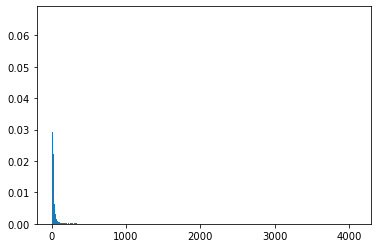

In [199]:
plt.hist(data.flatten(),bins=4095,density=True);

In [197]:
scaled_normalised_data = (scaled_image-np.min(scaled_image))/np.max(scaled_image)

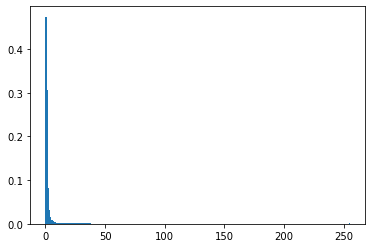

In [200]:
plt.hist(scaled_image.flatten(),bins=255,density=True);

In [32]:
counter = [] 

for i in data.flatten():
    #print(i)
    if i==4095:
        counter.append(i)
        
print(len(counter))

825


In [33]:
len(data.flatten())

2354176

In [5]:
f = h5py.File('/eos/experiment/awake/event_data/2024/10/08/'+files[15],'r')
off_screen_data = f['AwakeEventData'][f'TCC4.SPECTRO3.DigiCam']['ExtractionImage']['image2D'][0:250]

In [104]:
off_screen_data[3]

array([ 9,  4,  4, ...,  8,  8, 12], dtype=int16)

In [359]:
yy = np.arange(0,len(mean_y_intensity),1)
pdf = stats.laplace.pdf(yy, 650,1/700)

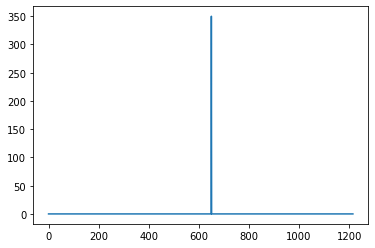

In [360]:
plt.plot(yy, pdf, label='PDF')

In [346]:
distribution = stats.norm

params = distribution.fit(mean_y_intensity)

In [347]:
samples = distribution.rvs(size=len(mean_y_intensity),*params)

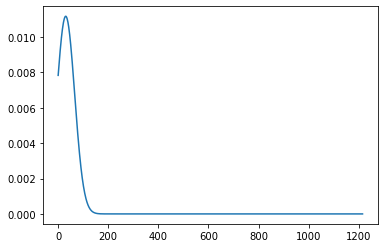

In [348]:
pdf = distribution.pdf(np.arange(0,len(mean_y_intensity),1),*params)

plt.plot(np.arange(0,len(mean_y_intensity),1),pdf)

In [212]:
#files = os.listdir('/eos/experiment/awake/event_data/2022/07/18')

#f1 = h5py.File('/eos/experiment/awake/event_data/2022/07/18/'+files[0],'r')

In [210]:
#list(f1['AwakeEventData'])

In [209]:
#plt.imshow(f1['AwakeEventData']['TCC4.DMD1.DigiCam']['ExtractionImage']['image2D'][:],cmap='Blues')

In [208]:
#plt.contour(f['AwakeEventData'][ 'TT41.BTV.412354.EXPVOL1.DigiCam']['ExtractionImage']['image2D'][:])